<a href="https://colab.research.google.com/github/Hayeon101/deep-learning-basic/blob/main/03/03_02_%EB%8B%A4%EC%A4%91_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80_(Multivariable_Linear_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

$x$가 1개인 선형 회귀를 단순 선형회귀 (Simple Linear Regression)이라고 하는데, 다수의 $x$로부터 $y$를 예측하는 다중 선형회귀 (Multivariable Linear Regression)에 대해 배웁니다.

## 1. 데이터에 대한 이해 (Data Definition)

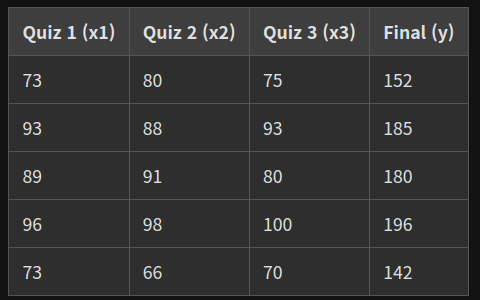

위 훈련 데이터를 보면 독립 변수 $x$의 개수가 3개입니다.

이로부터 수식을 이끌어 내면 다음과 같습니다.

$H(x) = w_1x_1 + w_2x_2 + w_3x_3 + b$

## 2. 파이토치로 구현하기

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [3]:
# 훈련 데이터 x를 3개 선언
x1_train = torch.FloatTensor([[73],[93],[89],[96],[73]])
x2_train = torch.FloatTensor([[80],[88],[91],[98],[66]])
x3_train = torch.FloatTensor([[75],[93],[90],[100],[70]])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])

In [4]:
# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [6]:
# optimizer 설정
optimizer = optim.SGD([w1,w2,w3,b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs+1):

  # H(x) 계산
  hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

  # cost 계산
  cost = torch.mean((hypothesis - y_train) ** 2)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
        epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
    ))

Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563628
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497595
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435044
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375726
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319507
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215703
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167810
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079390


## 3. 벡터와 행렬 연산으로 바꾸기

위 방식에서는 $x$가 3개였기 때문에 훈련 데이터와 가중치 모두 3개를 일일이 선언해 주었습니다. 그런데 이런 방식은 $x$의 개수가 크게 증가했을 때 매우 비효율적입니다.

이를 해결하기 위해 행렬 곱셈 연산 (벡터의 내적) 을 사용합니다. 가설을 벡터와 행렬 연산으로 표현할 수 있는 것입니다.

### 1) 벡터 연산으로 이해하기

앞서 작성했던
$H(x) = w_1x_1 + w_2x_2 + w_3x_3$
이 식은 아래와 같이 벡터의 내적으로 표현할 수 있습니다.

$\begin{pmatrix} x_1 & x_2 & x_3 \end{pmatrix} \cdot \begin{pmatrix} w_1 \\ w_2 \\ w_3 \end{pmatrix} = x_1w_1 + x_2w_2 + x_3w_3$

이는 $H(X) = XW$ 라는 가설입니다. $x$ 3개와 $w$ 3개를 각각 $X$와 $W$ 한 개로 표현했습니다.

### 2) 행렬 연산으로 이해하기

| Quiz 1 (x1) | Quiz 2 (x2) | Quiz 3 (x3) | Final (y) |
|-------------|-------------|-------------|-----------|
| 73          | 80          | 75          | 152       |
| 93          | 88          | 93          | 185       |
| 89          | 91          | 80          | 180       |
| 96          | 98          | 100         | 196       |
| 73          | 66          | 70          | 142       |

<br>훈련 데이터에서 1개의 단위를 샘플(sample)이라고 합니다. 또한 독립 변수 $x$는 특성(feature)이라고 합니다. 위 표의 데이터를 보면 샘플은 총 5개이고, 특성은 3개입니다.

독립 변수 $x$들은 따라서 ($3 × 5 = $) 15개가 되는데, 행렬 $X$로 표현해 봅시다.

$\begin{pmatrix}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23} \\
x_{31} & x_{32} & x_{33} \\
x_{41} & x_{42} & x_{43} \\
x_{51} & x_{52} & x_{53}
\end{pmatrix}
$

여기에 가중치 벡터 W와 편향 b까지 표시하면 다음과 같습니다.

$H(X) = XW + B$

$\begin{pmatrix}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23} \\
x_{31} & x_{32} & x_{33} \\
x_{41} & x_{42} & x_{43} \\
x_{51} & x_{52} & x_{53}
\end{pmatrix}
\begin{pmatrix}
w_1 \\
w_2 \\
w_3
\end{pmatrix}
+
\begin{pmatrix}
b \\
b \\
b \\
b \\
b
\end{pmatrix}
=
\begin{pmatrix}
x_{11}w_1 + x_{12}w_2 + x_{13}w_3 + b \\
x_{21}w_1 + x_{22}w_2 + x_{23}w_3 + b \\
x_{31}w_1 + x_{32}w_2 + x_{33}w_3 + b \\
x_{41}w_1 + x_{42}w_2 + x_{43}w_3 + b \\
x_{51}w_1 + x_{52}w_2 + x_{53}w_3 + b
\end{pmatrix}$



## 4. 행렬 연산을 고려하여 파이토치로 구현하기

행렬 연산을 파이토치로 구현해 봅시다.

In [7]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 80],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])

In [8]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


행렬 X가 5행 3열 이기 때문에 가중치 W는 3행 1열로 정의됩니다.

가설은 행렬곱을 하고 편향 b를 더하면서 정의하였습니다.

In [9]:
# 가중치와 편향 선언
W = torch.zeros((3,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [10]:
# 가설
hypothesis = x_train.matmul(W) + b

In [18]:
# 전체 코드
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 80],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])
# 모델 초기화
W = torch.zeros((3,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W,b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
  # H(x) 계산
  # 편향 b는 브로드 캐스팅 되어 각 샘플에 더해집니다.
  hypothesis = x_train.matmul(W) + b

  # cost 계산
  cost = torch.mean((hypothesis - y_train) ** 2)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # .squeeze().detach()를 통해 크기가 1인 차원을 제거하고 기울기 추적을 하지 않도록 합니다.
  print(f'Epoch {epoch:4d}/{nb_epochs} hypothesis: {hypothesis.squeeze().detach()} Cost: {cost.item():.6f}')

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) Cost: 3069.590088
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481873
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/20 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch   10/20 hyp

생성된 모델에 새로운 값을 넣어 예측해 봅시다.



```python
with torch.no_grad
```
이 블록 안에서는 기울기 계산을 비활성화 합니다. 예측을 할 때는 가중치 업데이트를 할 필요가 없기 때문입니다.

```pytohn
print(f'Predicted value for input {new_input.squeeze().tolist()}: {prediction.item()}')
```
new_input.squeeze().tolist()로 입력 값을 리스트 형태로 보기 쉽게 만듭니다.



In [16]:
# 임의의 입력 값에 대한 예측
with torch.no_grad():
  new_input = torch.FloatTensor([[75, 85, 72]]) # 예측하고 싶은 임의의 입력
  prediction = new_input.matmul(W) + b
  print(f'Predicted value for input {new_input.squeeze().tolist()}: {prediction.item()}')

Predicted value for input [75.0, 85.0, 72.0]: 156.8051300048828
